In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress, skew
import datetime
import string
from matplotlib.gridspec import GridSpec


(c1,c2,c3,c4)=('#1b9e77','#d95f02','#7570b3','#e7298a')

In [2]:
solar_dict = pickle.load(open('../../pickles/solar_df','rb'))


l=[]

for NP, d in solar_dict.items():

    for year,df in d.items():
      
        
#         df = df[~np.isnan(df['diffuse radiation'])]
        df = df[~np.isnan(df['global radiation'])]
        
        df = df[np.isin(df['month'],[9,10,11,12,1,2,3,4])]
#         df = df[np.isin(df['month'],[9,10,11,12])]
#         df = df[np.isin(df['month'],[1,2,3,4])]
        
        df = df[~np.isnan(df['surface temp'])]
        
        df = df[df['surface temp'] <0]
        
#         df['diff'] = df['tempC'] - df['surface temp']
            
        if df.shape[0]>0:
            l.append(df)
        
df = pd.concat(l,axis=0)
df.shape

df_lc = df[df['low cloud']>9]
df_no_low = df[df['low cloud']<1]
df_hc = df_no_low[df_no_low['total cloud']>9]
df_cs = df_no_low[df_no_low['total cloud']<1]

df_lc.shape[0],df_hc.shape[0],df_cs.shape[0]


(300, 46, 209)

In [12]:
for df in [df_lc,df_hc,df_cs]:
    
    d_low = df[(df['zenith']>=90)]
    
    print(d_low.shape[0])
    
    print(np.nanmean(d_low['global radiation']), np.nanmax(d_low['global radiation']))
    
    print(d_low[d_low['global radiation']==25])

8
1.625 5.0
Empty DataFrame
Columns: [NP, year, month, day, tempC, RH%, pressure hPa, wind speed, total cloud, low cloud, surface temp, num obs, latitude, longitude, diffuse radiation, direct radiation, global radiation, reflected radiation, albedo, net radiation, doy, zenith]
Index: []

[0 rows x 22 columns]
3
9.333333333333334 25.0
            NP  year  month  day  tempC   RH%  pressure hPa  wind speed  \
date                                                                      
1982-03-26  22    82      3   26  -25.7  75.0        1005.4           5   

            total cloud  low cloud  ...  latitude  longitude  \
date                                ...                        
1982-03-26         10.0        0.0  ...    86.468       2.37   

            diffuse radiation  direct radiation  global radiation  \
date                                                                
1982-03-26               25.0               NaN              25.0   

            reflected radiation  albe

In [14]:
for df in [df_lc,df_hc,df_cs]:
    
    d_low = df[(df['zenith']<80) & (df['zenith']>75)]
    
    print(np.nanmean(d_low['global radiation']))
    
#     print(d_low[d_low['global radiation']==25])

55.95652173913044
89.5
102.92307692307692


/tmp/ipykernel_21050/3313047243.py:22: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(x['global radiation'])


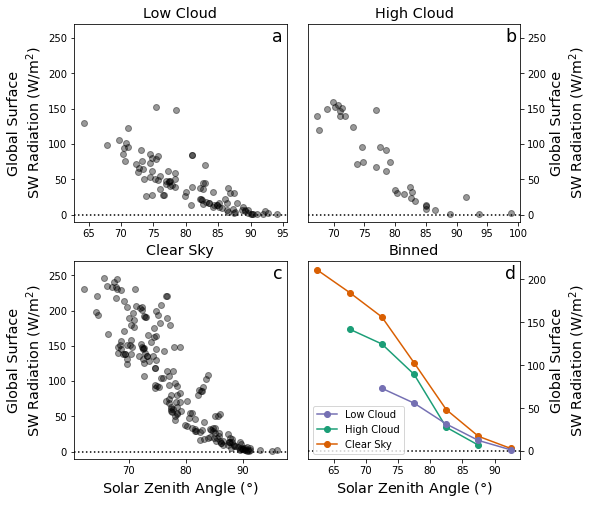

In [5]:
binned = {'means':{},
          'stds':{},
          'wind':{}}

names = ['Low Cloud','High Cloud','Clear Sky']

for name in names:
    binned['means'][name] = []
    binned['wind'][name] = []

bw=5

ranger = np.arange(62.5,97.5,bw)

for i in ranger:
    
    for df,name in zip([df_lc,df_hc,df_cs],names):
    
        x = df[df['zenith']<i+bw/2]
        x = x[x['zenith']>i-bw/2]
        
        mean = np.nanmean(x['global radiation'])
#         std = np.nanstd(x['diff'])
        
        if x.shape[0]<3:
            mean = np.nan
            std = np.nan
            
        binned['means'][name].append(mean)
#         binned['stds'][name].append(std)
#         binned['wind'][name].append(np.nanmean(x['wind speed']))
        

fig, axs = plt.subplots(2,2,figsize=(8,8))

for df,name,ax in zip([df_lc,df_hc,df_cs],['Low Cloud','High Cloud','Clear Sky'],axs.reshape(-1)):

    ax.scatter(df['zenith'],df['global radiation'],color='k',alpha=0.4)

    ax.set_title(name,fontsize='x-large')
    
    ax.set_ylim(-10,270)
    ax.axhline(0,color='k',ls=':')
#     ax.set_xlim(0,np.max(df['global radiation'])+10)
    
#     print(x[np.argmin(np.abs(x*lr[0]+lr[1]))])
    
ax1,ax2,ax3,ax4 = axs.reshape(-1)

a = 0.4
ax4.plot(ranger,binned['means']['Low Cloud'],marker='o',label='Low Cloud',color=c3,zorder=5)

ax4.plot(ranger,binned['means']['High Cloud'],marker='o',label='High Cloud',color=c1)

ax4.plot(ranger,binned['means']['Clear Sky'],marker='o',label='Clear Sky',color=c2)

ax4.set_title('Binned',fontsize='x-large')
    


ax4.legend(loc = 'lower left')
ax4.axhline(0,color='k',ls=':')
# ax4.set_xticks(ranger)
# xticklabels = [f'{int(r-(bw/2))} - {int(r+(bw/2))}' for r in ranger]
# ax4.set_xticklabels(xticklabels,rotation=45)

# ax4.set_ylim(-5,5)

for ax in [ax2,ax4]:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')


for ax,letter in zip(axs.reshape(-1),string.ascii_letters):
    
    ax.annotate(f'{letter}',
                xycoords='axes fraction',
                xy=(0.98,0.98),
                va='top',
                ha='right',
                fontsize='xx-large')
    
    ax.set_ylabel('Global Surface\nSW Radiation (W/m$^2$)',fontsize='x-large')
#     ax.set_yticks(np.arange(-5,6,1))

for ax in [ax3,ax4]:
    ax.set_xlabel('Solar Zenith Angle ($\degree$)',fontsize='x-large')
    
plt.subplots_adjust(wspace=0.1)


plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Inversion/supp_figs/TOA_to_SW_surf.png',dpi=400,bbox_inches='tight')

plt.show()

/tmp/ipykernel_11255/3958687819.py:22: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(x['diffuse radiation'])


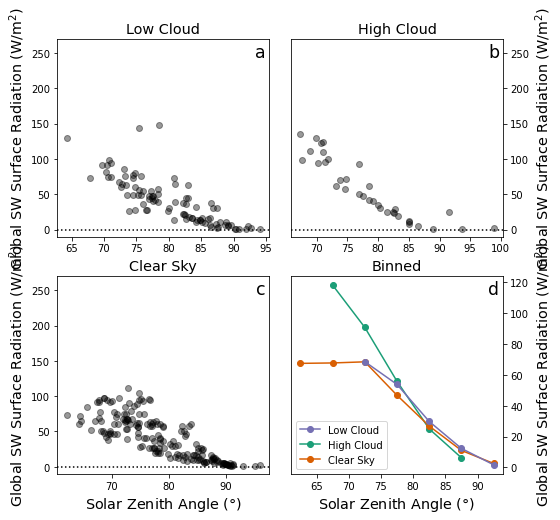

In [21]:
binned = {'means':{},
          'stds':{},
          'wind':{}}

names = ['Low Cloud','High Cloud','Clear Sky']

for name in names:
    binned['means'][name] = []
    binned['wind'][name] = []

bw=5

ranger = np.arange(62.5,97.5,bw)

for i in ranger:
    
    for df,name in zip([df_lc,df_hc,df_cs],names):
    
        x = df[df['zenith']<i+bw/2]
        x = x[x['zenith']>i-bw/2]
        
        mean = np.nanmean(x['diffuse radiation'])
#         std = np.nanstd(x['diff'])
        
        if x.shape[0]<3:
            mean = np.nan
            std = np.nan
            
        binned['means'][name].append(mean)
#         binned['stds'][name].append(std)
#         binned['wind'][name].append(np.nanmean(x['wind speed']))
        

fig, axs = plt.subplots(2,2,figsize=(8,8))

for df,name,ax in zip([df_lc,df_hc,df_cs],['Low Cloud','High Cloud','Clear Sky'],axs.reshape(-1)):

    ax.scatter(df['zenith'],df['diffuse radiation'],color='k',alpha=0.4)

    ax.set_title(name,fontsize='x-large')
    
    ax.set_ylim(-10,270)
    ax.axhline(0,color='k',ls=':')
#     ax.set_xlim(0,np.max(df['global radiation'])+10)
    
#     print(x[np.argmin(np.abs(x*lr[0]+lr[1]))])
    
ax1,ax2,ax3,ax4 = axs.reshape(-1)

a = 0.4
ax4.plot(ranger,binned['means']['Low Cloud'],marker='o',label='Low Cloud',color=c3,zorder=5)

ax4.plot(ranger,binned['means']['High Cloud'],marker='o',label='High Cloud',color=c1)

ax4.plot(ranger,binned['means']['Clear Sky'],marker='o',label='Clear Sky',color=c2)

ax4.set_title('Binned',fontsize='x-large')
    


ax4.legend(loc = 'lower left')
# ax4.set_xticks(ranger)
# xticklabels = [f'{int(r-(bw/2))} - {int(r+(bw/2))}' for r in ranger]
# ax4.set_xticklabels(xticklabels,rotation=45)

# ax4.set_ylim(-5,5)

for ax in [ax2,ax4]:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')


for ax,letter in zip(axs.reshape(-1),string.ascii_letters):
    
    ax.annotate(f'{letter}',
                xycoords='axes fraction',
                xy=(0.98,0.98),
                va='top',
                ha='right',
                fontsize='xx-large')
    
    ax.set_ylabel('Global SW Surface Radiation (W/m$^2$)',fontsize='x-large')
#     ax.set_yticks(np.arange(-5,6,1))

for ax in [ax3,ax4]:
    ax.set_xlabel('Solar Zenith Angle ($\degree$)',fontsize='x-large')
    
plt.subplots_adjust(wspace=0.1)


# plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Inversion/main_figs/sw_radiometer.png',dpi=400,bbox_inches='tight')

plt.show()

LinregressResult(slope=0.17079600112497495, intercept=0.678108906562841, rvalue=0.3100626869831167, pvalue=0.00053819082285408, stderr=0.04800711043660696, intercept_stderr=0.04186091095564969)
0.825531914893617
LinregressResult(slope=-0.11624363870342228, intercept=0.838904177760995, rvalue=-0.207009074227907, pvalue=0.009286334787285659, stderr=0.04412689203835623, intercept_stderr=0.02230826948989671)
0.8


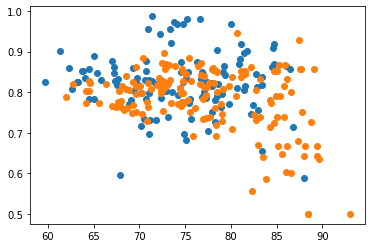

In [77]:
solar_dict = pickle.load(open('../../pickles/solar_df','rb'))


l=[]

for NP, d in solar_dict.items():

    for year,df in d.items():
      
        
#         df = df[~np.isnan(df['diffuse radiation'])]
        df = df[~np.isnan(df['global radiation'])]
        
#         df = df[np.isin(df['month'],[9,10,11,12,1,2,3,4])]
        
        df = df[~np.isnan(df['surface temp'])]
        
        df = df[df['surface temp'] <0]
        
#         df['diff'] = df['tempC'] - df['surface temp']
            
        if df.shape[0]>0:
            l.append(df)
        
df = pd.concat(l,axis=0)
df.shape

df['A'] = df['reflected radiation']/df['global radiation']
df['D'] = df['diffuse radiation']/df['global radiation']


df_clear = df[df['total cloud']>9]
df_cloud = df[df['total cloud']<1]

for d in [df_clear,df_cloud]:
    
    d = d[['A','D','zenith']]
    d.dropna(inplace=True)
    
    d=d[d['A']<1]
    d=d[d['D']<1]
    d=d[d['A']>0.4]
    
    d=d[d['zenith']>50]
    
    print(linregress(d['D'],d['A']))
    
    print(np.nanmedian(d['A']))
#     plt.hist(d['A'],alpha=0.1)
    
#     plt.hist(d['A'],color='blue',alpha=0.1)
    
    plt.scatter(d['zenith'],d['A'])
    
#     plt.xlim(50,100)
#     plt.xlim(0,1)
    
#     plt.ylabel('Albedo')
#     plt.xlabel('Diffuse Fraction')
#     plt.show()